In [2]:
!apt-get update

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:6 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:13 https://developer.

In [3]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [4]:
!wget -q https://mirror.linux-ia64.org/apache/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz

In [5]:
!tar -xvf spark-3.0.3-bin-hadoop2.7.tgz

spark-3.0.3-bin-hadoop2.7/
spark-3.0.3-bin-hadoop2.7/NOTICE
spark-3.0.3-bin-hadoop2.7/kubernetes/
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/worker_memory_check.py
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/py_container_checks.py
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/pyfiles.py
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/entrypoint.sh
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/Dockerfile
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/Dockerfile
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/Dockerfile
spark-3.0.3-bin-hadoop2.7/jars/
spark-3.0.3-bin-hadoop2.7/jars/jacks

In [6]:
!pip install -q findspark

In [7]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop2.7"

In [8]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

1. Загрузите данные при помощи spark.read.csv из приложенного файла.

In [38]:
df=spark.read.csv('iris.data', inferSchema=True, header=False)

2. Выведите 5 первых строк данных.

In [40]:
df=df.withColumnRenamed('_c0','sepal_length')

In [41]:
df=df.withColumnRenamed('_c1','sepal_width')

In [42]:
df=df.withColumnRenamed('_c2','petal_length')

In [43]:
df=df.withColumnRenamed('_c3','petal_width')

In [44]:
df=df.withColumnRenamed('_c4','variety')

In [45]:
df.show ()

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|    variety|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|
|         4.9|        3.1|         1.5|        0.1|Iris-setosa|
|         5.4|        3.7|         1.5|        0.2|Iris-setosa|
|         4.8|        3.4|         1.6|        0.2|Iris-setosa|
|         4.8|        3.0|         1.4| 

In [46]:
df.take (5)

[Row(sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2, variety='Iris-setosa'),
 Row(sepal_length=4.9, sepal_width=3.0, petal_length=1.4, petal_width=0.2, variety='Iris-setosa'),
 Row(sepal_length=4.7, sepal_width=3.2, petal_length=1.3, petal_width=0.2, variety='Iris-setosa'),
 Row(sepal_length=4.6, sepal_width=3.1, petal_length=1.5, petal_width=0.2, variety='Iris-setosa'),
 Row(sepal_length=5.0, sepal_width=3.6, petal_length=1.4, petal_width=0.2, variety='Iris-setosa')]

3. Воспользуйтесь командами groupBy, max, min и avg, чтобы вывести
максимальное минимальное и среднее значние каждого из аттрбутов
цветка ('sepal_length','sepal_width','petal_length','petal_width')

In [47]:
df_gr=df.groupBy('variety')

In [48]:
df_max=df_gr.max('sepal_length','sepal_width','petal_length','petal_width')

In [49]:
df_max.show()

+---------------+-----------------+----------------+-----------------+----------------+
|        variety|max(sepal_length)|max(sepal_width)|max(petal_length)|max(petal_width)|
+---------------+-----------------+----------------+-----------------+----------------+
| Iris-virginica|              7.9|             3.8|              6.9|             2.5|
|    Iris-setosa|              5.8|             4.4|              1.9|             0.6|
|Iris-versicolor|              7.0|             3.4|              5.1|             1.8|
+---------------+-----------------+----------------+-----------------+----------------+



In [51]:
df_min=df_gr.min('sepal_length','sepal_width','petal_length','petal_width')

In [52]:
df_min.show()

+---------------+-----------------+----------------+-----------------+----------------+
|        variety|min(sepal_length)|min(sepal_width)|min(petal_length)|min(petal_width)|
+---------------+-----------------+----------------+-----------------+----------------+
| Iris-virginica|              4.9|             2.2|              4.5|             1.4|
|    Iris-setosa|              4.3|             2.3|              1.0|             0.1|
|Iris-versicolor|              4.9|             2.0|              3.0|             1.0|
+---------------+-----------------+----------------+-----------------+----------------+



In [53]:
df_avg=df_gr.avg('sepal_length','sepal_width','petal_length','petal_width')

In [54]:
df_avg.show()

+---------------+-----------------+------------------+-----------------+------------------+
|        variety|avg(sepal_length)|  avg(sepal_width)|avg(petal_length)|  avg(petal_width)|
+---------------+-----------------+------------------+-----------------+------------------+
| Iris-virginica|6.587999999999998|2.9739999999999998|            5.552|             2.026|
|    Iris-setosa|5.005999999999999|3.4180000000000006|            1.464|0.2439999999999999|
|Iris-versicolor|            5.936|2.7700000000000005|             4.26|1.3259999999999998|
+---------------+-----------------+------------------+-----------------+------------------+



4. Постройте точечную диаграмму для petal_length и petal_width,
раскрашенный по типам цветков.

In [55]:
import pandas as pd

In [56]:
df_pd=df.toPandas()

In [57]:
df_pd

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [59]:
import seaborn as sns

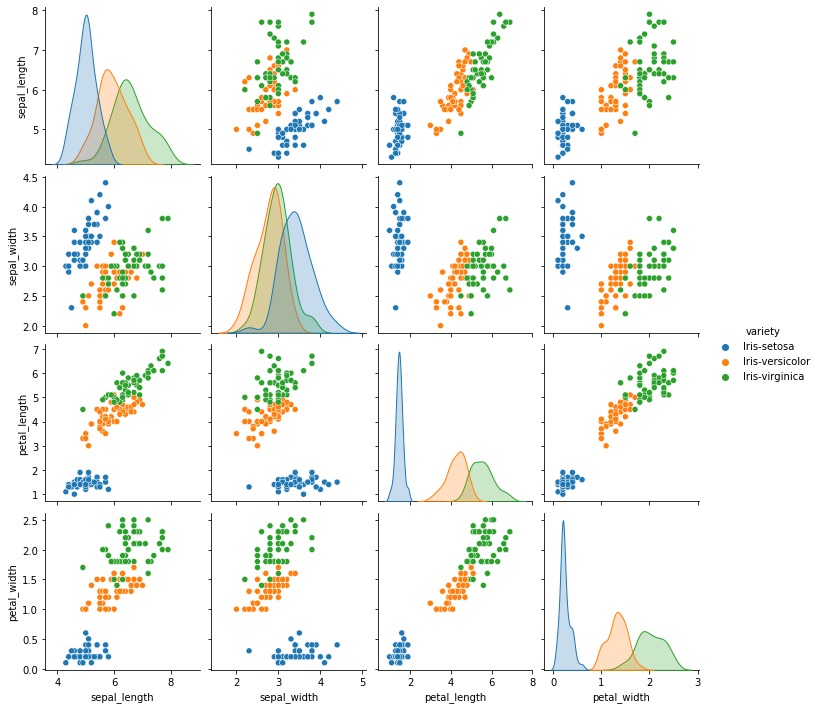

In [82]:
sns.pairplot(df_pd, hue='variety')

5. Посмотрите внимательно на получившийся график и сформируйте
правило вида ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА A < ЗНАЧЕНИЕ, ТО IRIS
ОТНОСИТСЯ К КЛАССУ SETOSA - ИНАЧЕ К КАКОМУ-ТО ДРУГОМУ
(НАЗОВЕМ, ЕГО НАПРИМЕР UNKNOWN).


Правило: если sepal_width<4, то это класс Setosa, иначе это другой класс 

6. При помощи команд withColumn, when, otherwise создайте в датафрейме
новую колонку с таким предсказанием.


In [88]:
from pyspark.sql.functions import when

In [177]:
df_pred=df.withColumn ('preduction', when(df.sepal_width<5,'Setosa'). otherwise('other'))

In [178]:
df_pred.show()

+------------+-----------+------------+-----------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|    variety|preduction|
+------------+-----------+------------+-----------+-----------+----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|    Setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|    Setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|    Setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|    Setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|    Setosa|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|    Setosa|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|    Setosa|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|    Setosa|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|    Setosa|
|         4.9|        3.1|         1.5|        0.1|Iris-setosa|    Setosa|
|         5.4|        3.7

7. Проверьте качество своего предсказания.
Для этого:
7.1. Подсчитайте количество строк, где Вы предсказали класс Setosa и
правильный класс был так же Setosa.
7.2. Подсчитайте количество строк, где Вы предсказали класс Setosa, а
правильный класс был какой-то другой (воспользуйтесь оператором "не равно" - !=)

In [179]:
print(f'True positive {df_pred.where(df_pred.variety==df_pred.preduction).count()}')
print(f'False positive {df_pred.where(df_pred.variety!=df_pred.preduction).count()}')

True positive 0
False positive 150
